# WeatherPy
----

### Analysis
* Temperature is getting higher in cities closer to the equator, and lower as the distance increase between the city and the equator. But northern cities seem to be colder this time of the year than the ones in southern cities.
* There is no strong relationship between latitude and humidity. However, in northern hemispheres, there is less humidity than  cities in the south, and there is high humidity in the closest cities to the equator.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.



In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url= "http://api.openweathermap.org/data/2.5/weather?"
Cloudiness= []
Country= []
Date= []
Humidity= []
Lat= []
Lng= []
Max_Temp= []
Wind_Speed= []

for i in range(len(cities)):
    try:
        query_url = url + "appid=" + api_key + "&q=" + cities[i]
        weather_response = requests.get(query_url).json()
        #weather_json = weather_response.json()
        Cloudiness.append(weather_response["clouds"]["all"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Humidity.append(weather_response["main"]["humidity"])
        Lat.append(weather_response["coord"]["lat"])
        Lng.append(weather_response["coord"]["lon"])
        Max_Temp.append((((weather_response["main"]["temp_max"])-273.15) * 9/5) + 32)
        Wind_Speed.append(weather_response["wind"]["speed"])
        
    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
city_weather = pd.DataFrame(list(zip(cities, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_Temp, Wind_Speed)), 
               columns =['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
city_weather.to_csv(output_data_file, encoding='utf-8')
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,baykit,90,CA,1556596545,43,53.71,-111.75,36.8006,2.81
1,puerto leguizamo,100,AU,1556596545,52,-23.58,149.07,76.9406,6.84
2,codrington,75,CL,1556596402,86,-53.16,-70.91,37.4000,4.60
3,salym,90,NZ,1556596212,84,-46.19,168.86,55.0040,0.45
4,hobart,90,CA,1556596507,60,45.36,-73.48,44.0060,2.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

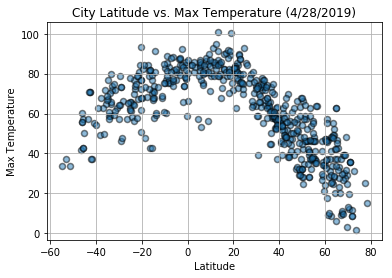

In [7]:
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], marker="o", alpha=0.5, edgecolors="black", linewidths=1.5)
plt.title("City Latitude vs. Max Temperature (4/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("latitude_maxtemp.png")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

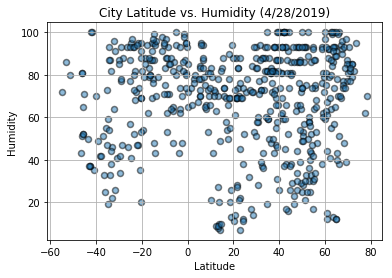

In [8]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], marker="o", alpha=0.5, edgecolors="black", linewidths=1.5)
plt.title("City Latitude vs. Humidity (4/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("latitude_Humid.png")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

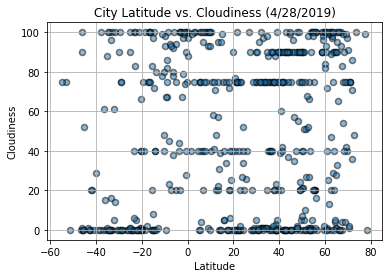

In [9]:
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], marker="o", alpha=0.5, edgecolors="black", linewidths=1.5)
plt.title("City Latitude vs. Cloudiness (4/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("latitude_cloud.png")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

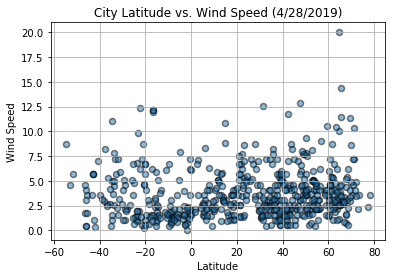

In [22]:
plt.scatter(city_weather['Lat'], city_weather['Wind Speed'], marker="o", alpha=0.5, edgecolors="black", linewidths=1.5)
plt.title("City Latitude vs. Wind Speed (4/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("latitude_winspeed.png")
plt.grid(True)
plt.show()